In [1]:
import pandas as pd
import numpy as np

In [2]:
LINK = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

In [3]:
quakes = pd.read_csv(LINK, parse_dates=['time', 'updated'])
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9184 entries, 0 to 9183
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             9184 non-null   datetime64[ns, UTC]
 1   latitude         9184 non-null   float64            
 2   longitude        9184 non-null   float64            
 3   depth            9184 non-null   float64            
 4   mag              9179 non-null   float64            
 5   magType          9179 non-null   object             
 6   nst              6458 non-null   float64            
 7   gap              7739 non-null   float64            
 8   dmin             6535 non-null   float64            
 9   rms              9183 non-null   float64            
 10  net              9184 non-null   object             
 11  id               9184 non-null   object             
 12  updated          9184 non-null   datetime64[ns, UTC]
 13  place            9

In [4]:
quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-12-22 18:39:53.530000+00:00,40.384666,-124.254837,22.11,2.04,md,6.0,189.0,0.10740,0.03,...,2021-12-22 18:48:11.924000+00:00,"7km NNE of Petrolia, CA",earthquake,1.63,0.83,0.180,6.0,automatic,nc,nc
1,2021-12-22 18:32:07.400000+00:00,36.021667,-117.846833,3.43,0.64,ml,11.0,151.0,0.03796,0.04,...,2021-12-22 18:46:53.855000+00:00,"10km ESE of Coso Junction, CA",earthquake,0.17,0.27,0.264,4.0,reviewed,ci,ci
2,2021-12-22 18:02:21.952000+00:00,59.819500,-153.055400,103.60,1.70,ml,NaN,NaN,NaN,0.50,...,2021-12-22 18:14:23.898000+00:00,"59 km E of Pedro Bay, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
3,2021-12-22 17:42:43.269000+00:00,61.124100,-150.455200,33.70,1.30,ml,NaN,NaN,NaN,0.47,...,2021-12-22 17:46:40.594000+00:00,"25 km NNE of Point Possession, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
4,2021-12-22 17:39:42.870000+00:00,38.773334,-122.740334,0.81,0.95,md,10.0,74.0,0.01028,0.03,...,2021-12-22 17:50:11.511000+00:00,"2km ESE of The Geysers, CA",earthquake,0.26,0.43,0.120,4.0,automatic,nc,nc


In [5]:
quakes.shape

(9184, 22)

In [6]:
quakes['timeframe'] = quakes['time'].apply(lambda x: str(x)[0:10])
quakes['starttime'] = quakes['time'].apply(lambda x: str(x)[0:19])
quakes['updatetime'] = quakes['updated'].apply(lambda x: str(x)[0:19])

quakes.filter(regex="time")

,time,timeframe,starttime,updatetime
0,2021-12-22 18:39:53.530000+00:00,2021-12-22,2021-12-22 18:39:53,2021-12-22 18:48:11
1,2021-12-22 18:32:07.400000+00:00,2021-12-22,2021-12-22 18:32:07,2021-12-22 18:46:53
2,2021-12-22 18:02:21.952000+00:00,2021-12-22,2021-12-22 18:02:21,2021-12-22 18:14:23
3,2021-12-22 17:42:43.269000+00:00,2021-12-22,2021-12-22 17:42:43,2021-12-22 17:46:40
4,2021-12-22 17:39:42.870000+00:00,2021-12-22,2021-12-22 17:39:42,2021-12-22 17:50:11
...,...,...,...,...
9179,2021-11-22 19:03:40.982000+00:00,2021-11-22,2021-11-22 19:03:40,2021-11-29 22:15:47
9180,2021-11-22 19:00:32.370000+00:00,2021-11-22,2021-11-22 19:00:32,2021-11-22 21:30:19
9181,2021-11-22 18:59:10.890000+00:00,2021-11-22,2021-11-22 18:59:10,2021-12-01 01:22:13
9182,2021-11-22 18:58:09.902000+00:00,2021-11-22,2021-11-22 18:58:09,2021-11-22 19:11:20


In [7]:
quakes = quakes.loc[quakes['mag']>0]

In [8]:
quakes.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                2721
gap                1440
dmin               2493
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2187
depthError            0
magError           1915
magNst             1444
status                0
locationSource        0
magSource             0
timeframe             0
starttime             0
updatetime            0
dtype: int64

In [9]:
# completed cases only
quakes = quakes.dropna(how="any")
quakes.isna().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
timeframe          0
starttime          0
updatetime         0
dtype: int64

In [10]:
quakes.shape

(3931, 25)

In [11]:
quakes = quakes.sort_values("time").reset_index(drop=True)
quakes.nunique()

time               3931
latitude           3471
longitude          3570
depth              1720
mag                 369
magType               3
nst                  98
gap                 303
dmin               3313
rms                  57
net                   9
id                 3931
updated            3931
place              2008
type                  4
horizontalError     442
depthError          615
magError            605
magNst               79
status                2
locationSource        9
magSource             9
timeframe            31
starttime          3929
updatetime         3915
dtype: int64

In [12]:
quakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,3931.000000,3931.000000,3931.00000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000,3931.00000,3931.000000
mean,36.625188,-114.459114,7.56225,1.317614,20.253879,108.593742,0.097619,0.122330,0.568920,2.645693,0.17232,11.223607
std,6.108465,13.251855,9.33335,0.777311,13.888566,60.937749,0.161152,0.084951,1.249553,6.931628,0.09066,12.084272
min,17.726000,-125.918833,-3.46000,0.010000,2.000000,13.000000,0.000305,0.000000,0.090000,0.100000,0.00000,1.000000
25%,33.866083,-122.206083,2.42000,0.750000,11.000000,64.000000,0.021040,0.060000,0.220000,0.410000,0.11000,4.000000
50%,37.121667,-117.647667,6.00000,1.160000,17.000000,90.000000,0.053660,0.110000,0.340000,0.610000,0.16000,8.000000
75%,38.832000,-115.176333,10.23500,1.790000,25.000000,140.500000,0.098945,0.170000,0.590000,1.220000,0.21200,14.000000
max,49.452833,-63.662300,184.00000,4.840000,174.000000,359.000000,2.190100,0.790000,54.500000,31.610000,0.77400,269.000000


In [13]:
quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,timeframe,starttime,updatetime
0,2021-11-22 18:59:10.890000+00:00,38.824167,-122.809833,1.95,1.46,md,46.0,35.0,0.000793,0.04,...,0.14,0.21,0.100,12.0,reviewed,nc,nc,2021-11-22,2021-11-22 18:59:10,2021-12-01 01:22:13
1,2021-11-22 19:00:32.370000+00:00,34.075667,-117.306167,15.89,1.19,ml,44.0,90.0,0.100100,0.14,...,0.19,0.41,0.154,24.0,reviewed,ci,ci,2021-11-22,2021-11-22 19:00:32,2021-11-22 21:30:19
2,2021-11-22 19:04:45.670000+00:00,35.913500,-117.705333,9.86,0.36,ml,17.0,63.0,0.056280,0.06,...,0.13,0.25,0.103,4.0,reviewed,ci,ci,2021-11-22,2021-11-22 19:04:45,2021-11-22 21:34:19
3,2021-11-22 19:43:21.310000+00:00,35.060500,-118.340833,-0.97,1.27,ml,31.0,39.0,0.069740,0.16,...,0.30,31.61,0.119,18.0,reviewed,ci,ci,2021-11-22,2021-11-22 19:43:21,2021-11-22 21:38:47
4,2021-11-22 20:00:29.970000+00:00,32.778333,-116.888000,-0.25,1.48,ml,26.0,55.0,0.062590,0.28,...,0.48,31.61,0.197,12.0,reviewed,ci,ci,2021-11-22,2021-11-22 20:00:29,2021-11-22 21:45:25


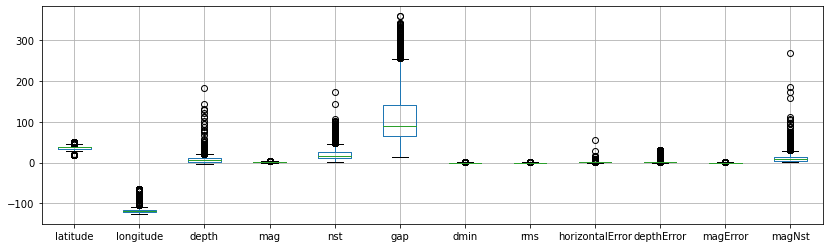

In [14]:
quakes.boxplot(figsize=(14,4));

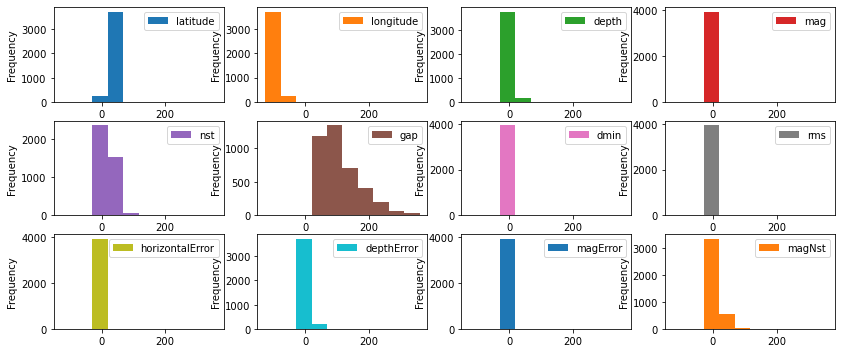

In [15]:
quakes.loc[:, quakes.dtypes==np.float64]\
.plot.hist(subplots=True, layout=(4,4), figsize=(14,8), sharey=False, sharex=False);

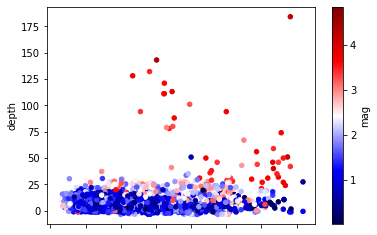

In [16]:
quakes.plot.scatter(x="gap", y="depth", c="mag", cmap="seismic");

In [17]:
q = quakes['type'].value_counts(dropna=False)

type(q)

pandas.core.series.Series

In [18]:
q

earthquake      3778
quarry blast     104
explosion         48
other event        1
Name: type, dtype: int64

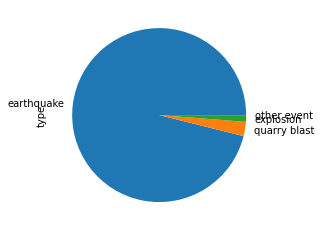

In [19]:
q.plot.pie();

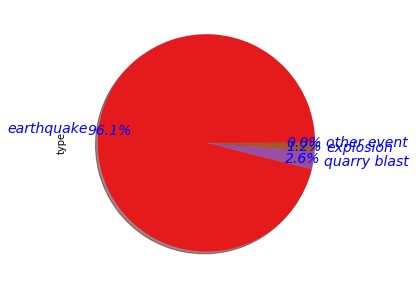

In [20]:
t = dict(color="b", fontsize=14, fontstyle="italic")

q.plot.pie(
    cmap="Set1",
    autopct="%.1f%%",
    figsize=(5,5),
    pctdistance=0.9,
    shadow=True,
    textprops=t
);

In [21]:
q = q[q.values<200]
q

quarry blast    104
explosion        48
other event       1
Name: type, dtype: int64

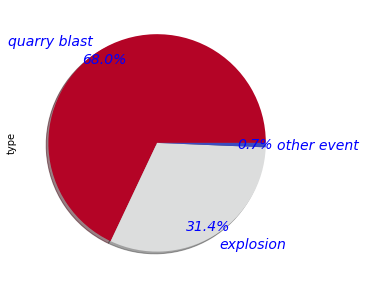

In [22]:
q.plot.pie(
    cmap="coolwarm_r",
    autopct="%.1f%%",
    figsize=(5,5),
    pctdistance=0.9,
    shadow=True,
    textprops=t
);

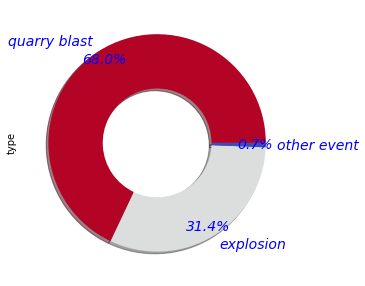

In [23]:
w = dict(width=0.5)

q.plot.pie(
    cmap="coolwarm_r",
    autopct="%.1f%%",
    figsize=(5,5),
    pctdistance=0.9,
    shadow=True,
    textprops=t,
    wedgeprops=w
);

In [24]:
q = quakes.pivot_table(index="timeframe", columns="type", values="mag", fill_value=0, aggfunc=np.mean)
q

type,earthquake,explosion,other event,quarry blast
timeframe,,,,
2021-11-22,1.382800,1.066667,0.00,1.316667
2021-11-23,1.385035,1.390000,0.00,1.612500
2021-11-24,1.327156,1.275000,0.00,1.294000
2021-11-25,1.382857,2.130000,0.00,1.560000
2021-11-26,1.313988,0.000000,0.00,0.000000
2021-11-27,1.112474,1.990000,0.00,0.000000
2021-11-28,1.422112,1.670000,0.00,0.000000
2021-11-29,1.275154,1.606667,0.00,1.356667
2021-11-30,1.301375,0.000000,0.00,1.222000


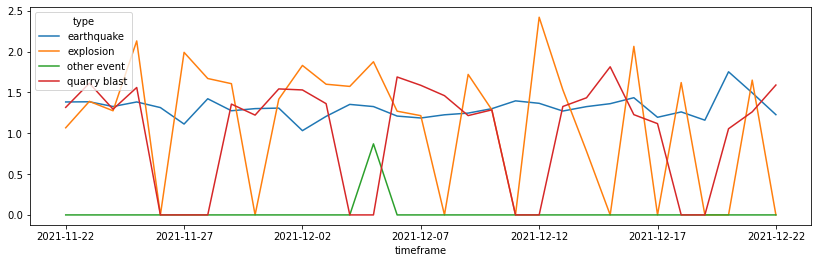

In [25]:
q.plot(figsize=(14,4));

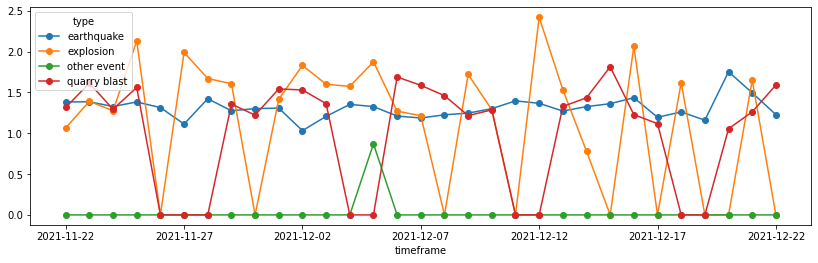

In [26]:
q.plot(marker="o", figsize=(14,4));

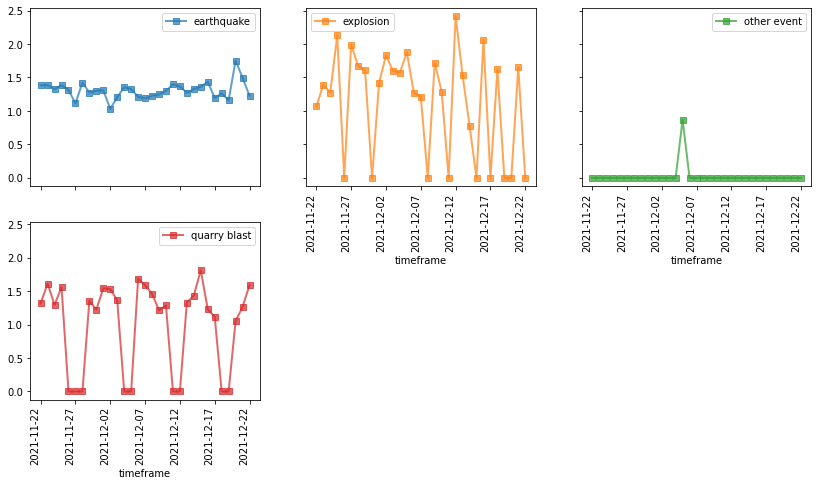

In [27]:
q.plot(
    subplots=True,
    lw=2,
    alpha=0.7,
    layout=(2,3),
    rot=90,
    sharex=True,
    sharey=True,
    marker="s",
    figsize=(14,8)
);

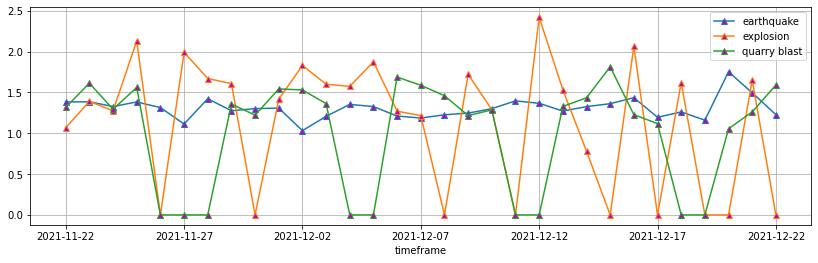

In [28]:
for i, cols in q.iteritems():
    if cols.sum() > 15:
        cols.plot(label=i, legend=True, marker="^", markerfacecolor="m", figsize=(14,4), grid=True)

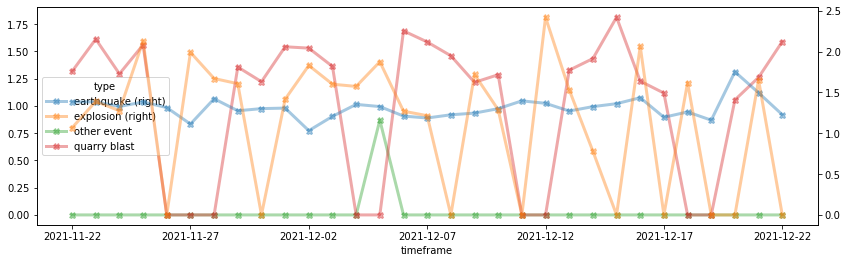

In [29]:
sec_y = ["earthquake", "explosion"]

q.plot(
    secondary_y=sec_y,
    mark_right=True,
    lw=3,
    marker="X",
    markersize=6,
    alpha=0.4,
    figsize=(14,4)
);

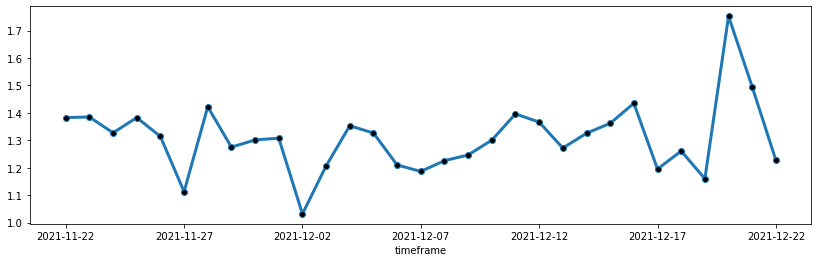

In [30]:
q['earthquake'].plot(lw=3, marker="o", markerfacecolor="k", figsize=(14,4));

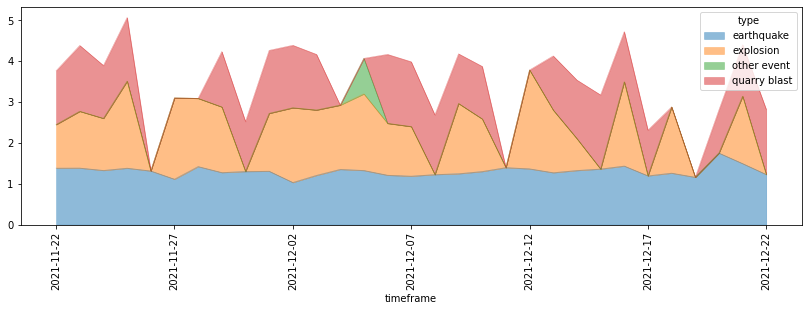

In [31]:
q.plot.area(alpha=0.5, rot=90, lw=0.5, figsize=(14,4));

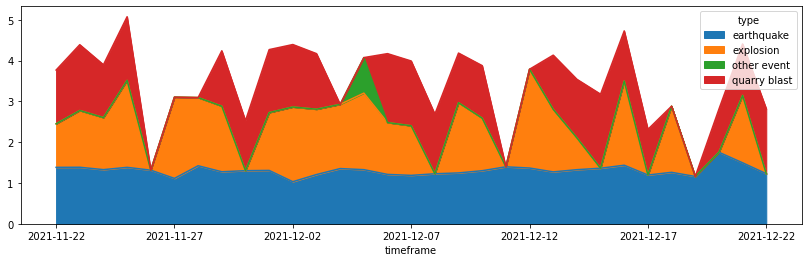

In [32]:
q.plot.area(stacked=True, figsize=(14,4));

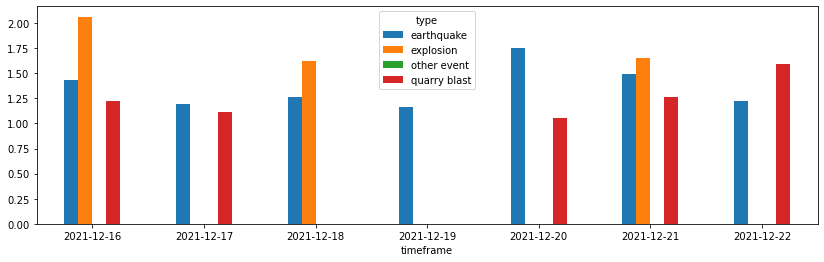

In [33]:
q.tail(7).plot.bar(stacked=False, rot=0, figsize=(14,4));

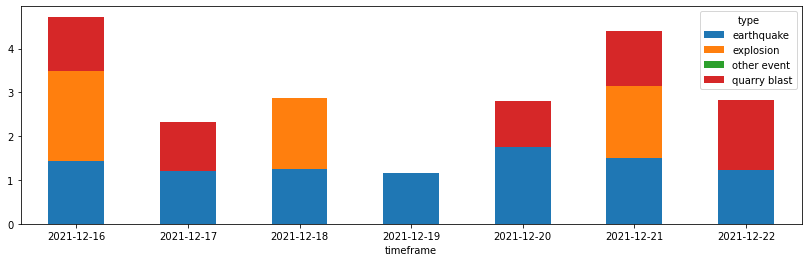

In [34]:
q.tail(7).plot.bar(stacked=True, rot=0, figsize=(14,4));